In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from dateutil.parser import parse
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# SCC

In [2]:
international_flight_2020 = pd.read_csv('data/international_flight_all_2020.csv')

In [3]:
len(set(international_flight_2020['origin']))

4209

In [4]:
international_flight_2020.shape

(2716040, 23)

In [5]:
international_flight_2020['count'] = [1] * international_flight_2020.shape[0]

In [6]:
international_flight_2020_combin = international_flight_2020.groupby(by = ['day', "origin", "destination"], as_index=False).sum()
international_flight_2020_data = international_flight_2020_combin[['day', 'origin', 'destination', 'count']]
international_flight_2020_data['dday'] = international_flight_2020_data['day'].apply(lambda x: parse(x).date())
international_flight_2020_data['Date'] = international_flight_2020_data['dday'].apply(lambda x: (x.strftime('%Y-%m-%d')))
international_flight_2020_data['week'] = international_flight_2020_data['dday'].apply(lambda x: (x.strftime('%V')))
international_flight_2020_data['month'] = international_flight_2020_data['dday'].apply(lambda x: (x.strftime('%m')))


<ipython-input-6-b15f5a74823d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  international_flight_2020_data['dday'] = international_flight_2020_data['day'].apply(lambda x: parse(x).date())
<ipython-input-6-b15f5a74823d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  international_flight_2020_data['Date'] = international_flight_2020_data['dday'].apply(lambda x: (x.strftime('%Y-%m-%d')))
<ipython-input-6-b15f5a74823d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [7]:
def build_week_graph(df, times):
    graph_list = []
    for time in times:
        cur_day_flights = df[df['week'] == time]
        directed_G = nx.from_pandas_edgelist(cur_day_flights,source = 'origin', target = 'destination', edge_attr=["count", "week"],create_using=nx.DiGraph())
        graph_list.append(directed_G)
    return graph_list

In [8]:
def build_month_graph(df, times):
    graph_list = []
    for time in times:
        cur_day_flights = df[df['month'] == time]
        directed_G = nx.from_pandas_edgelist(cur_day_flights,source = 'origin', target = 'destination', edge_attr=["count", "week"],create_using=nx.DiGraph())
        graph_list.append(directed_G)
    return graph_list

In [9]:
def find_SCC_isolate_number(graph_list):
    number_SCC_list = []
    number_isolate_list = []
    for graph in graph_list:
        number_SCC_list.append(nx.number_strongly_connected_components(graph))
        number_isolate_list.append(nx.number_of_isolates(graph))
    return number_SCC_list, number_isolate_list

In [10]:
weeks = set(international_flight_2020_data['week'])
months = set(international_flight_2020_data['month'])
graph_list_weeks = build_week_graph(international_flight_2020_data, weeks)
graph_list_months = build_month_graph(international_flight_2020_data, months)

In [11]:
number_SCC_list_week, number_isolate_list_week = find_SCC_isolate_number(graph_list_weeks)
number_SCC_list_months, number_isolate_list_months = find_SCC_isolate_number(graph_list_months)

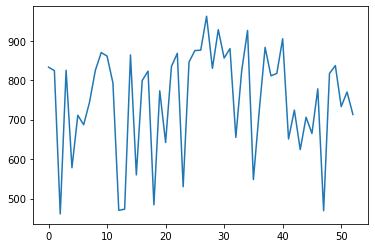

In [12]:
plt.plot(number_SCC_list_week, label = "2020")


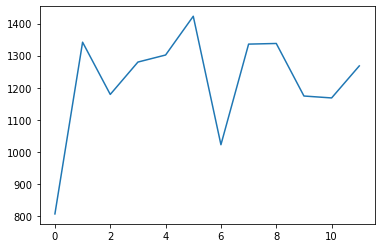

In [13]:
plt.plot(number_SCC_list_months, label = "2020")


In [14]:
international_flight_2019 = pd.read_csv('data/international_flight_all_2019.csv')

In [15]:
len(set(international_flight_2019['origin']))

4501

In [16]:
international_flight_2019.shape

(5403767, 23)

In [17]:
international_flight_2019['count'] = [1] * international_flight_2019.shape[0]
international_flight_2019_combin = international_flight_2019.groupby(by = ['day', "origin", "destination"], as_index=False).sum()
international_flight_2019_data = international_flight_2019_combin[['day', 'origin', 'destination', 'count']]
international_flight_2019_data['dday'] = international_flight_2019_data['day'].apply(lambda x: parse(x).date())
international_flight_2019_data['Date'] = international_flight_2019_data['dday'].apply(lambda x: (x.strftime('%Y-%m-%d')))
international_flight_2019_data['week'] = international_flight_2019_data['dday'].apply(lambda x: (x.strftime('%V')))
international_flight_2019_data['month'] = international_flight_2019_data['dday'].apply(lambda x: (x.strftime('%m')))


<ipython-input-17-c4c9acdf48e8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  international_flight_2019_data['dday'] = international_flight_2019_data['day'].apply(lambda x: parse(x).date())
<ipython-input-17-c4c9acdf48e8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  international_flight_2019_data['Date'] = international_flight_2019_data['dday'].apply(lambda x: (x.strftime('%Y-%m-%d')))
<ipython-input-17-c4c9acdf48e8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [18]:
international_flight_2019_data.loc[international_flight_2019_data['Date'] == '2019-12-31', 'week']='53'
international_flight_2019_data.loc[international_flight_2019_data['Date'] == '2019-12-30', 'week']='53'

In [19]:
international_flight_2019_data.tail()

,day,origin,destination,count,dday,Date,week,month
2590299,2019-12-31 00:00:00+00:00,ZGSZ,VMMC,2,2019-12-31,2019-12-31,53,12
2590300,2019-12-31 00:00:00+00:00,ZGSZ,VTBS,6,2019-12-31,2019-12-31,53,12
2590301,2019-12-31 00:00:00+00:00,ZGSZ,WBKK,2,2019-12-31,2019-12-31,53,12
2590302,2019-12-31 00:00:00+00:00,ZGSZ,WMKK,3,2019-12-31,2019-12-31,53,12
2590303,2019-12-31 00:00:00+00:00,ZGSZ,WSSS,3,2019-12-31,2019-12-31,53,12


In [20]:
weeks = set(international_flight_2019_data['week'])
months = set(international_flight_2019_data['month'])

graph_list_2019_weeks = build_week_graph(international_flight_2019_data, weeks)
graph_list_2019_months = build_month_graph(international_flight_2019_data, months)

In [21]:
number_SCC_list_2019_weeks, number_isolate_list_2019_weeks = find_SCC_isolate_number(graph_list_2019_weeks)
number_SCC_list_2019_months, number_isolate_list_2019_months = find_SCC_isolate_number(graph_list_2019_months)

In [65]:
a = [x/y for x, y in zip(number_SCC_list_week, number_SCC_list_2019_weeks)]
sum(a) / len(a)

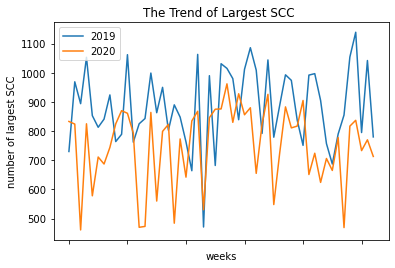

In [22]:
# line 1 points
fig,ax = plt.subplots(1)
# plotting the line 1 points 
ax.plot(number_SCC_list_2019_weeks, label = "2019")
# line 2 points
# plotting the line 2 points 
ax.plot(number_SCC_list_week, label = "2020")
plt.xlabel('weeks')
# Set the y axis label of the current axis.
plt.ylabel('number of largest SCC')
ax.set_xticklabels([])
plt.title("The Trend of Largest SCC ")
# Set a title of the current axes.
# plt.title('Two or more lines on same plot with suitable legends ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [23]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


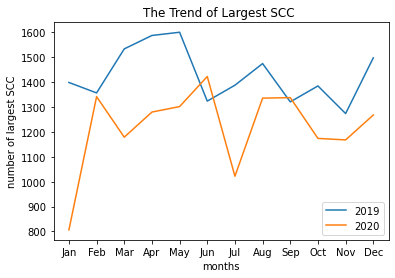

In [24]:

# line 1 points
fig,ax = plt.subplots(1)
# plotting the line 1 points 
ax.plot(month, number_SCC_list_2019_months, label = "2019")
# line 2 points
# plotting the line 2 points 
ax.plot(month, number_SCC_list_months, label = "2020")
plt.xlabel('months')
# Set the y axis label of the current axis.
plt.ylabel('number of largest SCC')
# ax.set_xticklabels([])
plt.title("The Trend of Largest SCC ")
# Set a title of the current axes.
# plt.title('Two or more lines on same plot with suitable legends ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [25]:
def build_daily_graph(df, times):
    graph_list = []
    for time in times:
        cur_day_flights = df[df['Date'] == time]
        directed_G = nx.from_pandas_edgelist(cur_day_flights,source = 'origin', target = 'destination', edge_attr=["count", "week"],create_using=nx.DiGraph())
        graph_list.append(directed_G)
    return graph_list

In [26]:
days = set(international_flight_2019_data['Date'])
graph_list_2019_days = build_daily_graph(international_flight_2019_data, days)

days = set(international_flight_2020_data['Date'])
graph_list_days = build_daily_graph(international_flight_2020_data, days)


In [27]:
number_SCC_list_2019_days, number_isolate_list_2019_days = find_SCC_isolate_number(graph_list_2019_days)
number_SCC_list_days, number_isolate_list_days = find_SCC_isolate_number(graph_list_days)

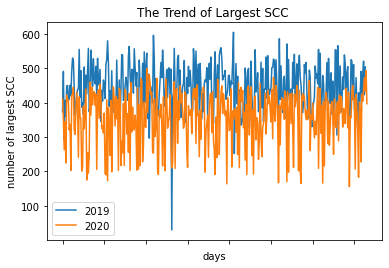

In [28]:
# line 1 points
fig, ax = plt.subplots(1)
# plotting the line 1 points 
ax.plot(number_SCC_list_2019_days, label = "2019")
# line 2 points
# plotting the line 2 points 
ax.plot(number_SCC_list_days, label = "2020")
plt.xlabel('days')
# Set the y axis label of the current axis.
plt.ylabel('number of largest SCC')
ax.set_xticklabels([])
plt.title("The Trend of Largest SCC ")
# Set a title of the current axes.
# plt.title('Two or more lines on same plot with suitable legends ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [32]:
number_SCC_list_2019_days_avg

[434.16129032258067,
 463.92857142857144,
 454.16129032258067,
 440.3,
 440.2903225806452,
 453.6,
 462.1290322580645,
 417.35483870967744,
 457.03333333333336,
 441.2258064516129,
 447.06451612903226,
 441.2413793103448]

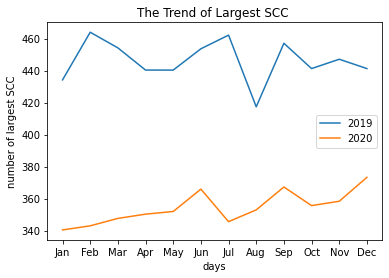

In [33]:
# line 1 points
fig, ax = plt.subplots(1)
# plotting the line 1 points 
ax.plot(month, number_SCC_list_2019_days_avg, label = "2019")
# line 2 points
# plotting the line 2 points 
ax.plot(month, number_SCC_list_2020_days_avg, label = "2020")
plt.xlabel('days')
# Set the y axis label of the current axis.
plt.ylabel('number of largest SCC')
# ax.set_xticklabels([])
plt.title("The Trend of Largest SCC ")
# Set a title of the current axes.
# plt.title('Two or more lines on same plot with suitable legends ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

# Isolated

In [34]:
international_flight_2020.head()

,number,typecode,origin,destination,day,origin_ident,origin_type,origin_name,origin_latitude_deg,origin_longitude_deg,...,destination_ident,destination_type,destination_name,destination_latitude_deg,destination_longitude_deg,destination_continent,destination_iso_country,destination_iso_region,destination_municipality,count
0,NaN,F50,YPAD,WSSL,2020-01-01 00:00:00+00:00,YPAD,large_airport,Adelaide International Airport,-34.945000,138.531006,...,WSSL,medium_airport,Seletar Airport,1.416950,103.867996,AS,SG,SG-02,Seletar,1
1,MU771,A359,YSSY,EHAM,2020-01-01 00:00:00+00:00,YSSY,large_airport,Sydney Kingsford Smith International Airport,-33.946098,151.177002,...,EHAM,large_airport,Amsterdam Airport Schiphol,52.308601,4.763890,EU,NL,NL-NH,Amsterdam,1
2,NaN,B789,SAEZ,LEBL,2020-01-01 00:00:00+00:00,SAEZ,large_airport,Ministro Pistarini International Airport,-34.822200,-58.535800,...,LEBL,large_airport,Barcelona International Airport,41.297100,2.078460,EU,ES,ES-CT,Barcelona,1
3,NaN,A332,RKSI,LIRF,2020-01-01 00:00:00+00:00,RKSI,large_airport,Incheon International Airport,37.469101,126.450996,...,LIRF,large_airport,Leonardo da Vinci–Fiumicino Airport,41.800278,12.238889,EU,IT,IT-62,Rome,1
4,NaN,B788,SBGR,LOWW,2020-01-01 00:00:00+00:00,SBGR,large_airport,Guarulhos - Governador André Franco Montoro In...,-23.435556,-46.473057,...,LOWW,large_airport,Vienna International Airport,48.110298,16.569700,EU,AT,AT-9,Vienna (Schwechat),1


In [35]:
top_airpors = international_flight_2019['origin'].value_counts()[:2000].index.tolist()


In [36]:
def build_week_graph(df, times, top_airpors):
    graph_list = []
    for time in times:
        cur_day_flights = df[df['week'] == time]
        directed_G= nx.from_pandas_edgelist(cur_day_flights,source = 'origin', target = 'destination', edge_attr=["count", "week"],create_using=nx.DiGraph())
        directed_G.add_nodes_from(top_airpors)
        graph_list.append(directed_G)
    return graph_list

In [37]:
weeks = set(international_flight_2020_data['week'])

graph_list_weeks_2020 = build_week_graph(international_flight_2020_data, weeks, top_airpors)


In [38]:
number_SCC_list_week_2020, number_isolate_list_week_2020 = find_SCC_isolate_number(graph_list_weeks_2020)


In [39]:
weeks = set(international_flight_2019_data['week'])

graph_list_weeks_2019 = build_week_graph(international_flight_2019_data, weeks, top_airpors)


In [40]:
number_SCC_list_week_2019, number_isolate_list_week_2019 = find_SCC_isolate_number(graph_list_weeks_2019)


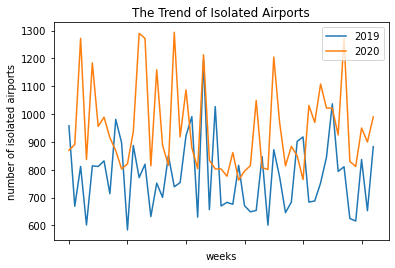

In [41]:
# line 1 points
fig,ax = plt.subplots(1)
# plotting the line 1 points 
ax.plot(number_isolate_list_week_2019, label = "2019")
# line 2 points
# plotting the line 2 points 
ax.plot(number_isolate_list_week_2020, label = "2020")
plt.xlabel('weeks')
# Set the y axis label of the current axis.
plt.ylabel('number of isolated airports')
ax.set_xticklabels([])
plt.title("The Trend of Isolated Airports")
# Set a title of the current axes.
# plt.title('Two or more lines on same plot with suitable legends ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [70]:
a = [x/y for x, y in zip(number_isolate_list_week_2019, number_isolate_list_week_2020)]
sum(a) / len(a)

0.8369240485450709

In [42]:
def build_month_iso_graph(df, times, top_airpors):
    graph_list = []
    for time in times:
        cur_day_flights = df[df['month'] == time]
        directed_G = nx.from_pandas_edgelist(cur_day_flights,source = 'origin', target = 'destination', edge_attr=["count", "week"],create_using=nx.DiGraph())
        directed_G.add_nodes_from(top_airpors)
        graph_list.append(directed_G)
    return graph_list

In [43]:
months = set(international_flight_2020_data['month'])

graph_iso_list_months_2020 = build_month_iso_graph(international_flight_2020_data, months, top_airpors)


In [44]:
number_SCC_iso_list_month_2020, number_isolate_list_month_2020 = find_SCC_isolate_number(graph_iso_list_months_2020)


In [45]:
months = set(international_flight_2019_data['month'])

graph_iso_list_months_2019 = build_month_iso_graph(international_flight_2019_data, months, top_airpors)


In [46]:
number_SCC_iso_list_month_2019, number_isolate_list_month_2019 = find_SCC_isolate_number(graph_iso_list_months_2019)


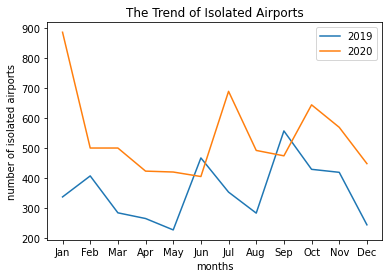

In [47]:
# line 1 points
fig,ax = plt.subplots(1)
# plotting the line 1 points 
ax.plot(month, number_isolate_list_month_2019, label = "2019")
# line 2 points
# plotting the line 2 points 
ax.plot(month, number_isolate_list_month_2020, label = "2020")
plt.xlabel('months')
# Set the y axis label of the current axis.
plt.ylabel('number of isolated airports')
# ax.set_xticklabels([])
plt.title("The Trend of Isolated Airports")
# Set a title of the current axes.
# plt.title('Two or more lines on same plot with suitable legends ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [48]:
def build_daily_iso_graph(df, times, top_airpors):
    graph_list = []
    for time in times:
        cur_day_flights = df[df['Date'] == time]
        directed_G = nx.from_pandas_edgelist(cur_day_flights,source = 'origin', target = 'destination', edge_attr=["count", "week"],create_using=nx.DiGraph())
        directed_G.add_nodes_from(top_airpors)
        graph_list.append(directed_G)
    return graph_list

In [49]:
days = set(international_flight_2020_data['Date'])

graph_iso_list_day_2020 = build_daily_iso_graph(international_flight_2020_data, days, top_airpors)


In [50]:
number_SCC_iso_list_day_2020, number_isolate_list_day_2020 = find_SCC_isolate_number(graph_iso_list_day_2020)


In [51]:
days = set(international_flight_2019_data['Date'])

graph_iso_list_day_2019 = build_daily_iso_graph(international_flight_2019_data, days, top_airpors)


In [52]:
number_SCC_iso_list_day_2019, number_isolate_list_day_2019 = find_SCC_isolate_number(graph_iso_list_day_2019)


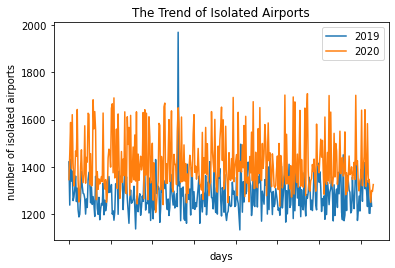

In [53]:
# line 1 points
fig,ax = plt.subplots(1)
# plotting the line 1 points 
ax.plot(number_isolate_list_day_2019, label = "2019")
# line 2 points
# plotting the line 2 points 
ax.plot(number_isolate_list_day_2020, label = "2020")
plt.xlabel('days')
# Set the y axis label of the current axis.
plt.ylabel('number of isolated airports')
ax.set_xticklabels([])
plt.title("The Trend of Isolated Airports")
# Set a title of the current axes.
# plt.title('Two or more lines on same plot with suitable legends ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

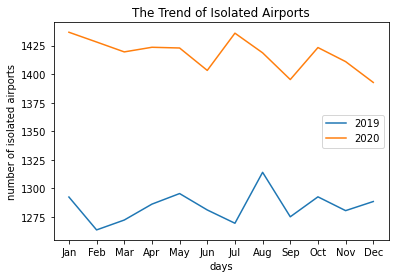

In [58]:
# line 1 points
fig, ax = plt.subplots(1)
# plotting the line 1 points 
ax.plot(month, number_isolate_list_day_2019_avg, label = "2019")
# line 2 points
# plotting the line 2 points 
ax.plot(month, number_isolate_list_day_2020_avg, label = "2020")
plt.xlabel('days')
# Set the y axis label of the current axis.
plt.ylabel('number of isolated airports')
# ax.set_xticklabels([])
plt.title("The Trend of Isolated Airports")
# Set a title of the current axes.
# plt.title('Two or more lines on same plot with suitable legends ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()